In [ ]:
from google.colab import auth
auth.authenticate_user()
import requests
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


sheetname="Frequency Hate Score" # Enter Sheet name without using extention
sh = gc.open(sheetname)
worksheet = sh.sheet1
sheets = worksheet.get_all_values()

# df = pd.DataFrame(sheets[55:213], columns=sheets[0], dtype=float)
df = pd.DataFrame(sheets[60:213], columns=sheets[0], dtype=float) # Starting from March
df.head(31)
# df.tail()


,Date,Frequency
0,2020-03-01,191.0
1,2020-03-02,34.0
2,2020-03-03,136.0
3,2020-03-04,202.0
4,2020-03-05,69.0
5,2020-03-06,67.0
6,2020-03-07,60.0
7,2020-03-08,47.0
8,2020-03-09,59.0
9,2020-03-10,68.0


In [ ]:
# Moving Average Method

df1 = df
df1=df1.drop(['Date'],axis=1)
rolling_mean = df1['Frequency'].rolling(window=7).mean()
rolling_std = df1['Frequency'].rolling(window=7).std()

m = rolling_mean + (rolling_std*2.0) # 3 gives no outliers
df1['Peaks'] = (df1['Frequency'].astype(float) - m).where(df1['Frequency'].astype(float) > m, np.nan)
print(df1)

# print(df1[df1['Frequency'].astype(float) > m])  # Boolean filter

     Frequency  Peaks
0        191.0    NaN
1         34.0    NaN
2        136.0    NaN
3        202.0    NaN
4         69.0    NaN
..         ...    ...
148       48.0    NaN
149       48.0    NaN
150       42.0    NaN
151       90.0    NaN
152       78.0    NaN

[153 rows x 2 columns]


In [ ]:
# Z score

df1 = df
df1=df1.drop(['Date'],axis=1)
rolling_mean = df1['Frequency'].rolling(window=7).mean()
rolling_std = df1['Frequency'].rolling(window=7).std()

z = (df1['Frequency'].astype(float) - rolling_mean) / (rolling_std) 
df1['Peaks'] = z
# df1['Peaks'] = z.where(z > 3, np.nan)
# print(df1)
df1.head(10)

# print(df1[z>2]) # Boolean filter

,Frequency,Peaks
0,191.0,NaN
1,34.0,NaN
2,136.0,NaN
3,202.0,NaN
4,69.0,NaN
5,67.0,NaN
6,60.0,-0.715471
7,47.0,-0.682806
8,59.0,-0.571394
9,68.0,-0.255940


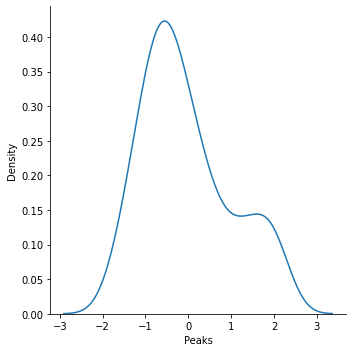

In [ ]:
x = df1['Peaks']
sns.displot(x,kind="kde")

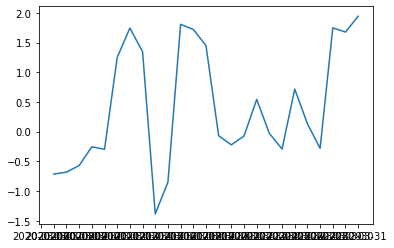

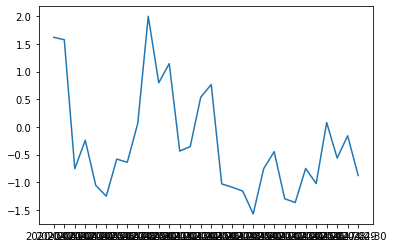

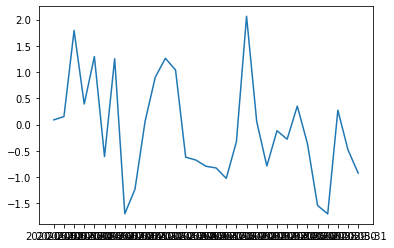

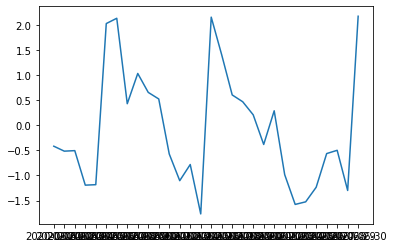

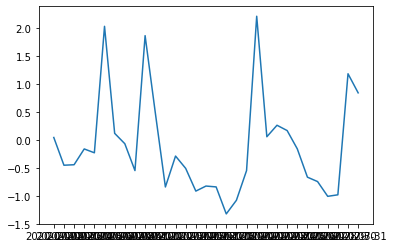

In [ ]:
df['HS_score'] = df1['Peaks']
p = df

p1 =df
# p['Date'].iloc[122:153]
plt.plot(p['Date'].iloc[0:31],p['HS_score'].iloc[0:31])
plt.show()
plt.plot(p['Date'].iloc[31:61],p['HS_score'].iloc[31:61])
plt.show()
plt.plot(p['Date'].iloc[61:92],p['HS_score'].iloc[61:92])
plt.show()
plt.plot(p['Date'].iloc[92:122],p['HS_score'].iloc[92:122])
plt.show()
plt.plot(p['Date'].iloc[122:153],p['HS_score'].iloc[122:153])

In [ ]:
from sklearn import preprocessing
import statistics
import math
from scipy import special
import matplotlib.pyplot as plt
import seaborn as sns

def Regularize(Score):
  f,x = np.histogram(Score)
  mxF = np.max(f)
  ind = np.where(f == mxF)
  s = (x[1]-x[0])/2
  baseS = x[ind[0]]-s
  regScore = Score - baseS
  regScore[regScore<0] = 0
  return regScore
  

def Normalize(Score):
  minS = np.min(Score)
  maxS = np.max(Score)
  normScore = (Score-minS) / (maxS-minS)
  return normScore


def Unify(Score):
  mu = np.mean(Score)
  sigma = np.std(Score)
  temp = (Score-mu)/(sigma*(math.sqrt(2)))
  uniScore = special.erf(temp)
  uniScore[uniScore < 0] = 0
  return uniScore



x = x[~np.isnan(x)]
mn = np.min(x)
mx = np.max(x)
Inf = float('inf')
if(abs(mn) > 0 and mx < Inf):
  x = Regularize(x)

mn = np.min(x)
mx = np.max(x)

if(mn==0 and mx > 1):
  x = Normalize(x)  

x = Unify(x) 

ZS = pd.DataFrame({'HS': x})

# x[x>0]
# x[x<0]
# x[x>1]

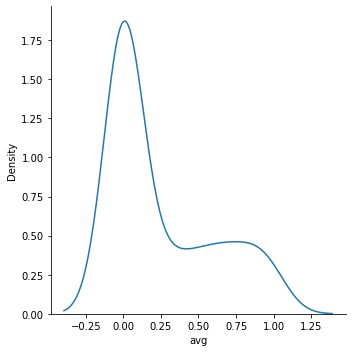

In [ ]:
sns.displot(x,kind="kde")

Anomaly Detection on Stock Data

In [ ]:

from google.colab import auth
auth.authenticate_user()
import requests
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sheetname="Stock" # Enter Sheet name without using extention
sh = gc.open(sheetname)
worksheet = sh.sheet1
sheets = worksheet.get_all_values()

df = pd.DataFrame(sheets[1:], columns=sheets[0])
df.head()

df1 = df
df1=df1.drop(['Date'], axis = 1) 
df1 = df1.apply(pd.to_numeric)

In [ ]:
# Z-score approach

score = pd.DataFrame()

for col in df1:
  rolling_mean = df1[col].rolling(window=7).mean()
  rolling_std = df1[col].rolling(window=7).std()

  z = (df1[col].astype(float) - rolling_mean) / (rolling_std) 
  score[col] = z

score['avg'] = score.mean(axis=1)
score.head(10)



,AAPL,MSFT,AMZN,GOOG,FB,TSLA,BRK.B,JPM,V,JNJ,WMT,NVDA,DIS,MA,PYPL,PG,UNH,BAC,HD,INTC,CMCSA,NFLX,VZ,XOM,ADBE,CRM,KO,ABT,NKE,T,MRNA,PFE,GSK,NVAX,AZN,avg
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-0.327773,-0.406741,-0.289773,-0.623245,-0.655436,-1.037614,-0.597417,-0.951589,-0.363231,0.485138,1.585707,-0.516294,-0.550847,-0.555597,-0.138708,0.090344,0.244039,-0.977656,-0.280858,-0.667536,-0.904644,-0.430618,-0.314494,-1.150857,-0.516870,-0.622248,-0.812152,0.311352,-0.470284,-0.690852,-1.706368,-0.379886,-0.991820,-0.764140,0.029267,-0.455706
7,-0.872431,-1.075564,-1.131610,-1.240594,-1.213656,-0.923094,-1.150229,-1.052464,-1.188819,-1.642110,-0.855712,-1.200812,-1.221393,-0.991095,-1.088012,-1.763756,-0.069806,-1.016620,-1.181874,-1.121998,-1.180621,-1.158154,-1.479363,-1.103653,-1.024941,-1.046869,-1.077906,-0.825281,-1.272695,-1.290231,-0.941097,-1.755126,-1.428426,-0.679929,-1.317201,-1.130947
8,-1.731714,-1.736533,-1.810654,-1.666819,-1.737768,-1.480018,-1.770442,-1.283205,-1.635553,-1.797166,-2.151961,-1.777594,-1.855348,-1.711169,-1.568239,-1.904641,-2.082862,-1.315469,-1.744543,-1.762305,-1.681066,-1.862334,-2.019448,-1.455252,-1.554374,-1.606091,-1.711151,-1.660742,-1.899673,-1.838492,-1.042627,-1.789649,-1.926947,-1.337780,-1.898952,-1.708817
9,0.099033,0.330525,-0.507664,-0.259750,-0.240474,-1.274410,-0.039268,0.373076,-0.047591,-0.309020,-0.112338,-0.477173,-0.480171,-0.098124,0.638496,-0.178500,-0.202226,0.247652,-0.645773,0.441010,0.365448,-0.700291,-0.507510,-1.017993,0.552704,-0.776640,-1.078584,0.903565,-1.249511,-0.271868,-1.018527,-0.355915,-1.011093,-1.363183,-1.005771,-0.322225


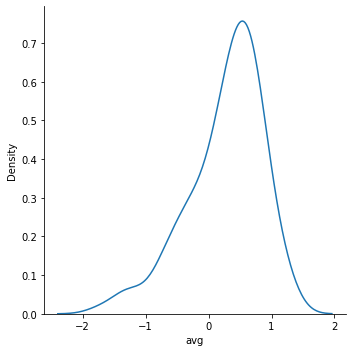

In [ ]:
import seaborn as sns

x = score['avg']
sns.displot(x,kind="kde")

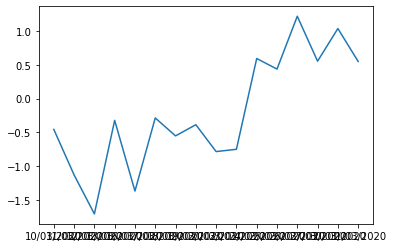

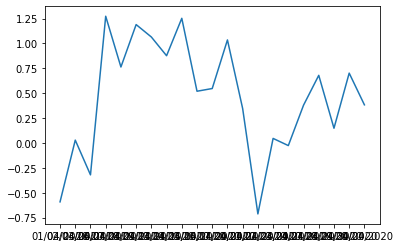

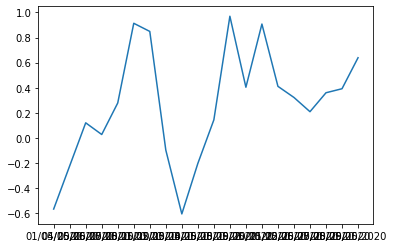

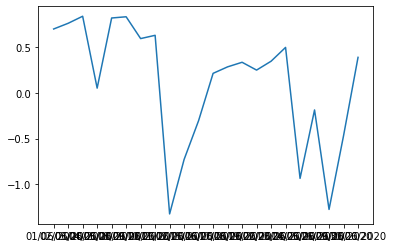

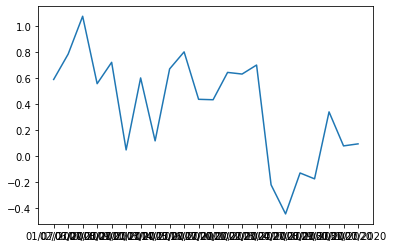

In [ ]:
df['Stock_score'] = x
p = df
p2 = df
# p['Date'].iloc[85:107]
plt.plot(p['Date'].iloc[0:22],p['Stock_score'].iloc[0:22])
plt.show()
plt.plot(p['Date'].iloc[22:43],p['Stock_score'].iloc[22:43])
plt.show()
plt.plot(p['Date'].iloc[43:63],p['Stock_score'].iloc[43:63])
plt.show()
plt.plot(p['Date'].iloc[63:85],p['Stock_score'].iloc[63:85])
plt.show()
plt.plot(p['Date'].iloc[85:107],p['Stock_score'].iloc[85:107])

In [ ]:
k = x

In [ ]:
from sklearn import preprocessing
import statistics
import math
from scipy import special
import matplotlib.pyplot as plt

def Regularize(Score):
  f,x = np.histogram(Score)
  mxF = np.max(f)
  ind = np.where(f == mxF)
  s = (x[1]-x[0])/2
  baseS = x[ind[0]]-s
  regScore = Score - baseS
  regScore[regScore<0] = 0
  return regScore
  

def Normalize(Score):
  minS = np.min(Score)
  maxS = np.max(Score)
  normScore = (Score-minS) / (maxS-minS)
  return normScore


def Unify(Score):
  mu = np.mean(Score)
  sigma = np.std(Score)
  temp = (Score-mu)/(sigma*(math.sqrt(2)))
  uniScore = special.erf(temp)
  uniScore[uniScore < 0] = 0
  return uniScore



x = x[~np.isnan(x)]
mn = np.min(x)
mx = np.max(x)
Inf = float('inf')
if(abs(mn) > 0 and mx < Inf):
  x = Regularize(x)

mn = np.min(x)
mx = np.max(x)

if(mn==0 and mx > 1):
  x = Normalize(x)  

x = Unify(x) 

ZS['Stock'] = x

# x[x>0]
# x[x<0]
# x[x>1]

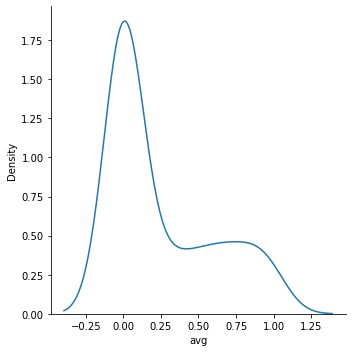

In [ ]:
sns.displot(x,kind="kde")

In [ ]:
from sklearn import preprocessing
import statistics
import math
from scipy import special
import matplotlib.pyplot as plt

def Regularize(Score):
  f,x = np.histogram(Score)
  mxF = np.max(f)
  ind = np.where(f == mxF)
  s = (x[1]-x[0])/2
  baseS = x[ind[0]]-s
  regScore = Score - baseS
  regScore[regScore>0] = 0
  return regScore
  

def Normalize(Score):
  minS = np.min(Score)
  maxS = np.max(Score)
  normScore = (Score-minS) / (maxS-minS)
  return normScore


def Unify(Score):
  mu = np.mean(Score)
  sigma = np.std(Score)
  temp = (Score-mu)/(sigma*(math.sqrt(2)))
  uniScore = special.erf(temp)
  uniScore[uniScore > 0] = 0
  return uniScore


x = k
x = x[~np.isnan(x)]
mn = np.min(x)
mx = np.max(x)
Inf = float('inf')
if(abs(mn) > 0 and mx < Inf):
  x = Regularize(x)


mn = np.min(x)
mx = np.max(x)

if(mx==0 and mn < -1):
  x = Normalize(x)  

x = Unify(x) 

ZS['Stock_fall'] = x.abs()

# x[x>0]
# x[x<0]
# x[x>1]

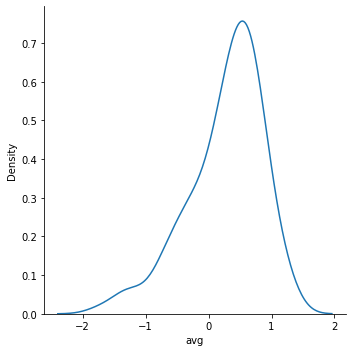

In [ ]:
import seaborn as sns

x = score['avg']
sns.displot(x,kind="kde")

In [ ]:
from google.colab import files

ZS.to_csv('ZS.csv')
files.download('ZS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

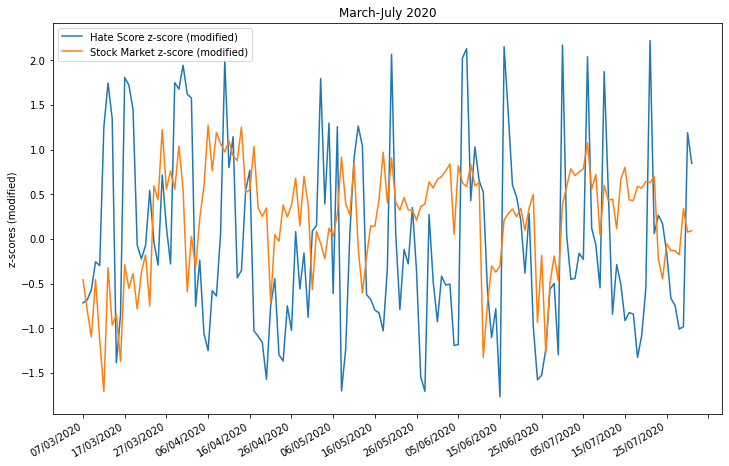

In [ ]:
# Plot z-scores for Hate Score and Stock market
import matplotlib.pyplot as plt
from google.colab import files
import matplotlib.ticker as mticker

myLocator = mticker.MultipleLocator(10)

sheetname="test" # Enter Sheet name without using extention
sh = gc.open(sheetname)
worksheet = sh.sheet1
sheets = worksheet.get_all_values()

p2 = pd.DataFrame(sheets[1:], columns=sheets[0], dtype=float) # Starting from March

# p2.head(31)

for i in range (len(p2['Score'])):
  if (p2['Score'][i]=='NaN'):
    p2['Score'][i]=np.nan

# Replace NaN values with rolling mean of data
p2['Score'] = p2['Score'].fillna((p2['Score'].rolling(min_periods=1, center=True, window=7).mean()))    

# p2['Date'].index=pd.date_range('01/03/2020', periods=31, freq='5D')

p = plt.figure()
fig, ax = plt.subplots(figsize=(12,8))

# March 6:31
# April 31:61
# May 61:92
# Jun 92:122
# Jul 122:153

plt.plot(p2['Date'].iloc[6:153],p1['HS_score'].iloc[6:153],label='Hate Score z-score (modified)')
plt.plot(p2['Date'].iloc[6:153],p2['Score'].iloc[6:153],label='Stock Market z-score (modified)')

ax.xaxis.set_major_locator(myLocator)
plt.gcf().autofmt_xdate()

# plt.xticks([])
# plt.yticks([])

# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Days")
plt.ylabel("z-scores (modified)")
plt.title("March-July 2020")

# Adding legend, which helps us recognize the curve according to it's color
# plt.legend()
plt.legend(loc='upper left')


plt.show()  
